# The Battle of the Neighborhoods - Week 1

## A description of the problem and a discussion of the background

## Introduction & Business Problem :

## Problem Background:

The City of New York,is the most populous city in the United States with an estimated 2018 population of 8,398,748 distributed over about 302.6 square miles (784 km2). It is diverse and is the financial capital of USA. It is multicultural. It provides lot of business oppourtunities and business friendly environment. It has attracted many different players into the market. It is a global hub of business and commerce. This also means that the market is highly competitive. As it is highly developed city so cost of doing business is also one of the highest. Thus, any new business venture or expansion needs to be analysed carefully. 

## Problem Description:

The restaurant business specializes in the preparation and serving of food and drink to customers. The City of New York is famous for its excelllent cuisine. It's food culture includes an array of international cuisines influenced by the city's immigrant history. It is truley a melting pot of the cutltures around the world here is a list of a few.

Central and Eastern European immigrants, especially Jewish immigrants - bagels, cheesecake, hot dogs, knishes, and delicatessens

Italian immigrants - New York-style pizza and Italian cuisine

Jewish immigrants and Irish immigrants - pastrami and corned beef

Chinese and other Asian restaurants, sandwich joints, trattorias, diners, and coffeehouses are ubiquitous throughout the city

So it is evident that to survive in such competitive market it is very important to startegically plan. In the present project various factors will be studied so as to decide on the Location such as :

New York City Demographics

Who are the competitors in that location?

Cuisine served / Menu of the competitors

Segmentation of the Borough



## Target Audience:

I must lead the Data Science team to locate and recommend to the management which neighborhood of Newyork city will be best choice to start a Japnanese restaurant. The Management also expects to understand the rationale of the recommendations made. This would interest anyone who wants to start a new Japanese restaurant in New York city.

## Success Criteria:

The success criteria of the project will be a good recommendation of such restaurants and their viabilty by understanding where the best chance exists in breaking into the restaurant industry.

## The Battle of the Neighborhoods - Week 1

A description of the data and how it will be used to solve the problem.
One city will be analysed in this project : Newyork City.

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

Luckily, this dataset exists for free on the web. Feel free to try to find this dataset on your own, but here is the link to the dataset:

https://geo.nyu.edu/catalog/nyu_2451_34572

For the below analysis we will get data from wikipedia as given below :

New York Population
New York City Demographics
Cuisine of New York city
https://en.wikipedia.org/wiki/New_York_City

https://en.wikipedia.org/wiki/Economy_of_New_York_City

https://en.wikipedia.org/wiki/Portal:New_York_City

https://en.wikipedia.org/wiki/Cuisine_of_New_York_City


Newyork city geographical coordinates data will be utilized as input for the Foursquare API, that will be leveraged to provision venues information for each neighborhood.We will use the Foursquare API to explore neighborhoods in New York City. The below is image of the Foursquare API data.

# The Battle of the Neighborhoods - Week 2

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

#from bs4 import BeautifulSoup
import os

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Libraries imported.')

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::ibm-wsrt-py37main-main==custom=1937
  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37hafa7651_0
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=1937
done

# All requested packages already installed.

Libraries imported.


In [2]:
# Define Foursquare Credentials and Version

CLIENT_ID = 'HTZB3T15SPFHYYRK4ELGPDTWH0XWC5ZBLRAQZ5NS2DDS3ZAS' # your Foursquare ID
CLIENT_SECRET = 'MVGUN4540RMPP5FIAMG4RG33HHSRNCBVYLCF2QCQGM2X1VOH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

## Now let's define the functions we are going to use later in this project

In [3]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

### Get initial data

In [4]:
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [5]:
ny_data.shape

(306, 4)

### Initial Data Analysis

Neighborhood data:

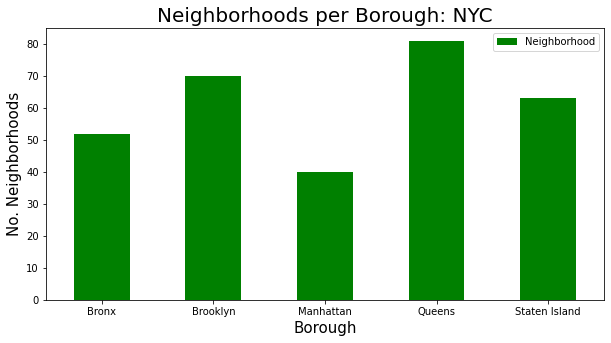

In [6]:
clr = "green"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()


## How many Japanese resaurants are in each neighborhood?

In [7]:
# queens has most neighborhoods
# prepare neighborhood list that contains japanese restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
japanese_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    japanese_restaurants=venues[venues['Category']=='Japanese Restaurant']   
    print('(',count,'/',len(ny_data),')','Japanese Restaurants in '+Neighborhood+', '+Borough+':'+str(len(japanese_restaurants)))
    print(row)
    for resturant_detail in japanese_restaurants.values.tolist():
        id, name , category=resturant_detail
        japanese_rest_ny = japanese_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Japanese Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Japanese Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Japanese Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Japanese Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Japanese Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Japanese Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Japanese Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Japanese Restaurants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Japanese Restaurants in Norwood, B

( 67 / 306 ) Japanese Restaurants in Carroll Gardens, Brooklyn:1
['Brooklyn', 'Carroll Gardens', 40.680540231076485, -73.99465372828006]
( 68 / 306 ) Japanese Restaurants in Red Hook, Brooklyn:0
['Brooklyn', 'Red Hook', 40.676253230250886, -74.0127589747356]
( 69 / 306 ) Japanese Restaurants in Gowanus, Brooklyn:0
['Brooklyn', 'Gowanus', 40.673931143187154, -73.99444087145339]
( 70 / 306 ) Japanese Restaurants in Fort Greene, Brooklyn:1
['Brooklyn', 'Fort Greene', 40.68852726018977, -73.97290574369092]
( 71 / 306 ) Japanese Restaurants in Park Slope, Brooklyn:1
['Brooklyn', 'Park Slope', 40.67232052268197, -73.97705030183924]
( 72 / 306 ) Japanese Restaurants in Cypress Hills, Brooklyn:0
['Brooklyn', 'Cypress Hills', 40.68239101144211, -73.87661596457296]
( 73 / 306 ) Japanese Restaurants in East New York, Brooklyn:0
['Brooklyn', 'East New York', 40.669925700847045, -73.88069863917366]
( 74 / 306 ) Japanese Restaurants in Starrett City, Brooklyn:0
['Brooklyn', 'Starrett City', 40.64758

( 130 / 306 ) Japanese Restaurants in Astoria, Queens:0
['Queens', 'Astoria', 40.76850859335492, -73.91565374304234]
( 131 / 306 ) Japanese Restaurants in Woodside, Queens:1
['Queens', 'Woodside', 40.74634908860222, -73.90184166838284]
( 132 / 306 ) Japanese Restaurants in Jackson Heights, Queens:0
['Queens', 'Jackson Heights', 40.75198138007367, -73.88282109164365]
( 133 / 306 ) Japanese Restaurants in Elmhurst, Queens:0
['Queens', 'Elmhurst', 40.744048505122024, -73.88165622288388]
( 134 / 306 ) Japanese Restaurants in Howard Beach, Queens:1
['Queens', 'Howard Beach', 40.65422527738487, -73.8381376460028]
( 135 / 306 ) Japanese Restaurants in Corona, Queens:0
['Queens', 'Corona', 40.74238175015667, -73.85682497345258]
( 136 / 306 ) Japanese Restaurants in Forest Hills, Queens:0
['Queens', 'Forest Hills', 40.72526378216503, -73.84447500788983]
( 137 / 306 ) Japanese Restaurants in Kew Gardens, Queens:0
['Queens', 'Kew Gardens', 40.7051790354148, -73.82981905825703]
( 138 / 306 ) Japan

( 196 / 306 ) Japanese Restaurants in North Corona, Queens:0
['Queens', 'North Corona', 40.7540709990489, -73.85751790676447]
( 197 / 306 ) Japanese Restaurants in Forest Hills Gardens, Queens:0
['Queens', 'Forest Hills Gardens', 40.7146110815117, -73.8410221123401]
( 198 / 306 ) Japanese Restaurants in St. George, Staten Island:0
['Staten Island', 'St. George', 40.6449815710044, -74.07935312512797]
( 199 / 306 ) Japanese Restaurants in New Brighton, Staten Island:0
['Staten Island', 'New Brighton', 40.64061455913511, -74.08701650516625]
( 200 / 306 ) Japanese Restaurants in Stapleton, Staten Island:0
['Staten Island', 'Stapleton', 40.62692762538176, -74.07790192660066]
( 201 / 306 ) Japanese Restaurants in Rosebank, Staten Island:0
['Staten Island', 'Rosebank', 40.61530494652761, -74.06980526716141]
( 202 / 306 ) Japanese Restaurants in West Brighton, Staten Island:1
['Staten Island', 'West Brighton', 40.63187892654607, -74.1071817826561]
( 203 / 306 ) Japanese Restaurants in Grymes H

( 257 / 306 ) Japanese Restaurants in Randall Manor, Staten Island:0
['Staten Island', 'Randall Manor', 40.63563000681151, -74.09805062373887]
( 258 / 306 ) Japanese Restaurants in Howland Hook, Staten Island:0
['Staten Island', 'Howland Hook', 40.63843283794795, -74.18622331749823]
( 259 / 306 ) Japanese Restaurants in Elm Park, Staten Island:0
['Staten Island', 'Elm Park', 40.630146741193826, -74.1418167896889]
( 260 / 306 ) Japanese Restaurants in Remsen Village, Brooklyn:0
['Brooklyn', 'Remsen Village', 40.652117451793494, -73.91665331978048]
( 261 / 306 ) Japanese Restaurants in New Lots, Brooklyn:0
['Brooklyn', 'New Lots', 40.6627442796966, -73.88511776379292]
( 262 / 306 ) Japanese Restaurants in Paerdegat Basin, Brooklyn:0
['Brooklyn', 'Paerdegat Basin', 40.63131755039667, -73.90233474295836]
( 263 / 306 ) Japanese Restaurants in Mill Basin, Brooklyn:2
['Brooklyn', 'Mill Basin', 40.61597423962336, -73.91515391550404]
( 264 / 306 ) Japanese Restaurants in Jamaica Hills, Queens:0

In [8]:
#japanese_rest_ny.to_csv('japanese_rest_ny_tocsv1.csv') # Save the information so far to a .csv file due to limited calls on FourSquare
japanese_rest_ny.to_csv('japanese_rest_ny_tocsv1.csv')

In [9]:
japanese_ny = pd.read_csv('japanese_rest_ny_tocsv1.csv')
japanese_rest_ny.tail()

,Borough,Neighborhood,ID,Name
64,Manhattan,Flatiron,581a10901df6b32e66ec3a07,Sugarfish
65,Manhattan,Flatiron,5bd7a5561c675b0039be9acc,HALL
66,Manhattan,Flatiron,55805bb5498e8356d675aa22,Yakiniku Futago
67,Queens,Sunnyside Gardens,4ba2a9cbf964a520d00d38e3,Oki Japanese Restaurant
68,Brooklyn,Fulton Ferry,5cf1562460255e002c5e683c,Bessou


In [10]:
japanese_rest_ny.shape

(69, 4)

### Demographic data

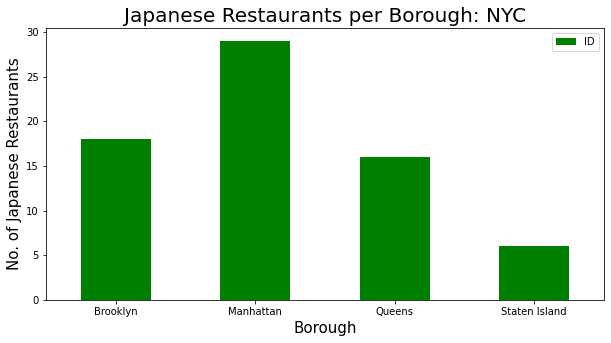

In [11]:
japanese_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Japanese Restaurants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of Japanese Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

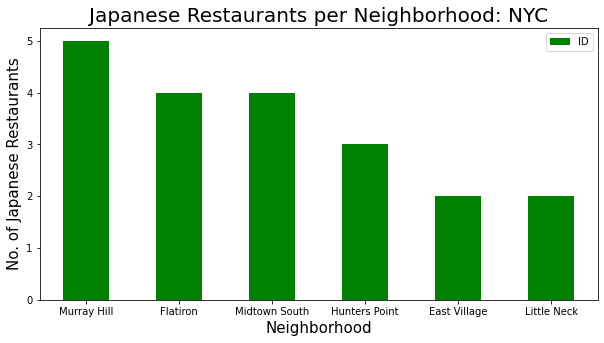

In [12]:
NOofNeigh = 6 # top number for graphing all the same past 6
japanese_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color=clr)
plt.title('Japanese Restaurants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No. of Japanese Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [13]:
japanese_rest_ny[japanese_rest_ny['Neighborhood']=='Murray Hill']

,Borough,Neighborhood,ID,Name
22,Manhattan,Murray Hill,4a99b4f4f964a520f62f20e3,Kajitsu
23,Manhattan,Murray Hill,559cbaa6498eaa4e8d884811,Tempura Matsui
24,Manhattan,Murray Hill,591caee89deb7d0f69be77a2,Omusubi Gonbei
25,Manhattan,Murray Hill,540dc46d498e86f0e5059dd2,Zuma New York
42,Queens,Murray Hill,4bc8eee83740b713fcbe5d65,Northern Sushi


### So the Murray Hill in Manhattan has the highest number of Japanese Restaurants with a total count of 5.

### Now we will get the ranking of each restaurant for further analysis.

In [14]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
japanese_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in japanese_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(japanese_rest_ny),')','processed')
    japanese_rest_stats_ny = japanese_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
japanese_rest_stats_ny.tail()

{'meta': {'code': 200, 'requestId': '604d534968265d51917cddcf'}, 'response': {'venue': {'id': '4d5c12a01e43236a87eb1583', 'name': 'Sake Sushi', 'contact': {'phone': '7188515299', 'formattedPhone': '(718) 851-5299'}, 'location': {'address': '328 Church Ave', 'crossStreet': 'East 4th Street', 'lat': 40.644138, 'lng': -73.976439, 'labeledLatLngs': [{'label': 'display', 'lat': 40.644138, 'lng': -73.976439}], 'postalCode': '11218', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['328 Church Ave (East 4th Street)', 'Brooklyn, NY 11218', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sake-sushi/4d5c12a01e43236a87eb1583', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 49}, 'url': 'http

{'meta': {'code': 200, 'requestId': '604d5349e60d7552d330aeef'}, 'response': {'venue': {'id': '51f9b7b3498eefe896caeb23', 'name': 'Shalom Japan', 'contact': {'phone': '7183884012', 'formattedPhone': '(718) 388-4012', 'twitter': 'shalomjapan'}, 'location': {'address': '310 S 4th St', 'crossStreet': 'at Rodney St', 'lat': 40.709219, 'lng': -73.955839, 'labeledLatLngs': [{'label': 'display', 'lat': 40.709219, 'lng': -73.955839}], 'postalCode': '11211', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['310 S 4th St (at Rodney St)', 'Brooklyn, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/shalom-japan/51f9b7b3498eefe896caeb23', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}, {'id': '52e81612bcbc57f1066b79fd', 'nam

{'meta': {'code': 200, 'requestId': '604d534a6841db0efd56dcf5'}, 'response': {'venue': {'id': '479ccb47f964a5206b4d1fe3', 'name': 'Iron Chef House', 'contact': {'phone': '7188588517', 'formattedPhone': '(718) 858-8517', 'facebook': '115805155108798', 'facebookUsername': 'IronChefHouse', 'facebookName': 'Iron Chef House'}, 'location': {'address': '92 Clark St', 'crossStreet': 'Henry St', 'lat': 40.697405738767394, 'lng': -73.99256031665585, 'labeledLatLngs': [{'label': 'display', 'lat': 40.697405738767394, 'lng': -73.99256031665585}, {'label': 'entrance', 'lat': 40.69726, 'lng': -73.992604}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['92 Clark St (Henry St)', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/iron-chef-house/479ccb47f964a5206b4d1fe3', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName'

{'meta': {'code': 200, 'requestId': '604d534ac1c49a0429c55205'}, 'response': {'venue': {'id': '5e4f270b03b7910008721f2e', 'name': 'Karazishi Botan', 'contact': {'phone': '3477631155', 'formattedPhone': '(347) 763-1155', 'instagram': 'karazishi_botan', 'facebook': '110365083873021', 'facebookUsername': 'KarazishiBotanBKLYN', 'facebookName': 'Karazishi Botan'}, 'location': {'address': '255 Smith St', 'crossStreet': 'Degraw St', 'lat': 40.683154, 'lng': -73.992888, 'labeledLatLngs': [{'label': 'display', 'lat': 40.683154, 'lng': -73.992888}], 'postalCode': '11231', 'cc': 'US', 'neighborhood': 'Boerum Hill', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['255 Smith St (Degraw St)', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/karazishi-botan/5e4f270b03b7910008721f2e', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon'

{'meta': {'code': 200, 'requestId': '604d534aa1434823a89d0d0c'}, 'response': {'venue': {'id': '5276d39a498eb1a5d90096e4', 'name': 'Sushi Katsuei', 'contact': {'phone': '7187885338', 'formattedPhone': '(718) 788-5338', 'instagram': 'sushikatsuei', 'facebook': '566743240069984', 'facebookUsername': 'SushiKatsuei', 'facebookName': 'Sushi Katsuei'}, 'location': {'address': '210 7th Ave', 'crossStreet': 'at 3rd St', 'lat': 40.67061519402922, 'lng': -73.97850388946965, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67061519402922, 'lng': -73.97850388946965}], 'postalCode': '11215', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['210 7th Ave (at 3rd St)', 'Brooklyn, NY 11215', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sushi-katsuei/5276d39a498eb1a5d90096e4', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'htt

{'meta': {'code': 200, 'requestId': '604d534aa1434823a89d0d6c'}, 'response': {'venue': {'id': '4e3cadcb1f6e844231dbe017', 'name': 'Waza', 'contact': {'phone': '7183999292', 'formattedPhone': '(718) 399-9292'}, 'location': {'address': '485 Myrtle Ave', 'lat': 40.693487522158414, 'lng': -73.965735666986, 'labeledLatLngs': [{'label': 'display', 'lat': 40.693487522158414, 'lng': -73.965735666986}, {'label': 'entrance', 'lat': 40.693575, 'lng': -73.965731}], 'postalCode': '11205', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['485 Myrtle Ave', 'Brooklyn, NY 11205', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/waza/4e3cadcb1f6e844231dbe017', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'ti

{'meta': {'code': 200, 'requestId': '604d534b224ae2464579cd37'}, 'response': {'venue': {'id': '58a202a25490d30f87553a08', 'name': 'Rice & Miso', 'contact': {'phone': '9292793488', 'formattedPhone': '(929) 279-3488', 'twitter': 'riceandmiso', 'instagram': 'riceandmisoeveryday'}, 'location': {'address': '134 Nevins St', 'lat': 40.68463349074915, 'lng': -73.9837684857605, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68463349074915, 'lng': -73.9837684857605}], 'postalCode': '11217', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['134 Nevins St', 'Brooklyn, NY 11217', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/rice--miso/58a202a25490d30f87553a08', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 

{'meta': {'code': 200, 'requestId': '604d534b6841db0efd56e081'}, 'response': {'venue': {'id': '51f9b7b3498eefe896caeb23', 'name': 'Shalom Japan', 'contact': {'phone': '7183884012', 'formattedPhone': '(718) 388-4012', 'twitter': 'shalomjapan'}, 'location': {'address': '310 S 4th St', 'crossStreet': 'at Rodney St', 'lat': 40.709219, 'lng': -73.955839, 'labeledLatLngs': [{'label': 'display', 'lat': 40.709219, 'lng': -73.955839}], 'postalCode': '11211', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['310 S 4th St (at Rodney St)', 'Brooklyn, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/shalom-japan/51f9b7b3498eefe896caeb23', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}, {'id': '52e81612bcbc57f1066b79fd', 'nam

{'meta': {'code': 200, 'requestId': '604d534b6841db0efd56e136'}, 'response': {'venue': {'id': '5a1e0dddb2958f1efac02a71', 'name': 'Shinka Ramen & Sake Bar', 'contact': {'phone': '2123438111', 'formattedPhone': '(212) 343-8111'}, 'location': {'address': '93 Bowery', 'lat': 40.71714667084875, 'lng': -73.99520581390026, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71714667084875, 'lng': -73.99520581390026}], 'postalCode': '10002', 'cc': 'US', 'neighborhood': 'Chinatown', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['93 Bowery', 'New York, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/shinka-ramen--sake-bar/5a1e0dddb2958f1efac02a71', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipC

{'meta': {'code': 200, 'requestId': '604d534c905915231af56006'}, 'response': {'venue': {'id': '542efa85498ea11026c9746c', 'name': 'Kappo Masa', 'contact': {'phone': '2129067141', 'formattedPhone': '(212) 906-7141'}, 'location': {'address': '976 Madison Ave', 'crossStreet': '76th Street', 'lat': 40.77452684529511, 'lng': -73.96346606906828, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77452684529511, 'lng': -73.96346606906828}, {'label': 'entrance', 'lat': 40.774636, 'lng': -73.963525}], 'postalCode': '10075', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['976 Madison Ave (76th Street)', 'New York, NY 10075', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kappo-masa/542efa85498ea11026c9746c', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': 

{'meta': {'code': 200, 'requestId': '604d534cd34f6c62afaed2aa'}, 'response': {'venue': {'id': '5aa1d85d5f68b931b6f5acda', 'name': 'Kome Waza UES', 'contact': {'phone': '6468385928', 'formattedPhone': '(646) 838-5928'}, 'location': {'address': '1275 1st Ave', 'crossStreet': '69th St', 'lat': 40.765601636058776, 'lng': -73.95740334822048, 'labeledLatLngs': [{'label': 'display', 'lat': 40.765601636058776, 'lng': -73.95740334822048}], 'postalCode': '10065', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1275 1st Ave (69th St)', 'New York, NY 10065', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kome-waza-ues/5aa1d85d5f68b931b6f5acda', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1bd941735', 'nam

{'meta': {'code': 200, 'requestId': '604d534d3d1214676f8811e5'}, 'response': {'venue': {'id': '51fd77be498e883bf20fcca8', 'name': 'OOTOYA 大戸屋 (OOTOYA)', 'contact': {'phone': '2127040833', 'formattedPhone': '(212) 704-0833', 'twitter': 'ootoyany', 'facebookUsername': 'Ootoyanyc', 'facebookName': 'OOTOYA NY'}, 'location': {'address': '141 W 41st St', 'crossStreet': 'btwn Broadway & 6th Ave', 'lat': 40.75497346338808, 'lng': -73.98610346565407, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75497346338808, 'lng': -73.98610346565407}], 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['141 W 41st St (btwn Broadway & 6th Ave)', 'New York, NY 10036', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ootoya-%E5%A4%A7%E6%88%B8%E5%B1%8B/51fd77be498e883bf20fcca8', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': 

{'meta': {'code': 200, 'requestId': '604d534dd6dbbd0b3d08ed8a'}, 'response': {'venue': {'id': '559cbaa6498eaa4e8d884811', 'name': 'Tempura Matsui', 'contact': {'phone': '2129868885', 'formattedPhone': '(212) 986-8885', 'twitter': 'tempuramatsui', 'facebook': '1412228069107274', 'facebookName': 'Tempura Matsui'}, 'location': {'address': '222 E 39th St', 'crossStreet': 'btwn Tunnel Exit St & 2nd Ave', 'lat': 40.7484611562686, 'lng': -73.97497442973443, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7484611562686, 'lng': -73.97497442973443}], 'postalCode': '10016', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['222 E 39th St (btwn Tunnel Exit St & 2nd Ave)', 'New York, NY 10016', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tempura-matsui/559cbaa6498eaa4e8d884811', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'pref

{'meta': {'code': 200, 'requestId': '604d534e69f3fa7a5724cb02'}, 'response': {'venue': {'id': '540dc46d498e86f0e5059dd2', 'name': 'Zuma New York', 'contact': {'phone': '2125449862', 'formattedPhone': '(212) 544-9862', 'facebook': '647684171911030', 'facebookUsername': 'zumanewyork', 'facebookName': 'Zuma'}, 'location': {'address': '261 Madison Ave', 'lat': 40.75052689410716, 'lng': -73.980782390213, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75052689410716, 'lng': -73.980782390213}], 'postalCode': '10016', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['261 Madison Ave', 'New York, NY 10016', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/zuma-new-york/540dc46d498e86f0e5059dd2', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'pr

{'meta': {'code': 200, 'requestId': '604d534e2318c6252203a09c'}, 'response': {'venue': {'id': '510c85e7e4b0056826b88297', 'name': 'Kura', 'contact': {'phone': '2122281010', 'formattedPhone': '(212) 228-1010'}, 'location': {'address': '130 Saint Marks Pl', 'crossStreet': 'btwn 1st Ave & Ave A', 'lat': 40.726802644699376, 'lng': -73.98344407523645, 'labeledLatLngs': [{'label': 'display', 'lat': 40.726802644699376, 'lng': -73.98344407523645}], 'postalCode': '10009', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['130 Saint Marks Pl (btwn 1st Ave & Ave A)', 'New York, NY 10009', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kura/510c85e7e4b0056826b88297', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48

{'meta': {'code': 200, 'requestId': '604d534e222e3f1aecb5b14d'}, 'response': {'venue': {'id': '535978ff498ec5450feaef85', 'name': 'Azasu', 'contact': {'phone': '2127777069', 'formattedPhone': '(212) 777-7069', 'twitter': 'azasunyc'}, 'location': {'address': '49 Clinton St', 'lat': 40.719627714039376, 'lng': -73.98480299175428, 'labeledLatLngs': [{'label': 'display', 'lat': 40.719627714039376, 'lng': -73.98480299175428}, {'label': 'entrance', 'lat': 40.719711, 'lng': -73.984846}], 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['49 Clinton St', 'New York, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/azasu/535978ff498ec5450feaef85', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'veri

{'meta': {'code': 200, 'requestId': '604d534f56b7ae7d6abb9ea4'}, 'response': {'venue': {'id': '51de06aa498e998d374ab4da', 'name': 'Hirohisa', 'contact': {'phone': '2129251613', 'formattedPhone': '(212) 925-1613'}, 'location': {'address': '73 Thompson St', 'lat': 40.72456567801656, 'lng': -74.00287302105048, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72456567801656, 'lng': -74.00287302105048}, {'label': 'entrance', 'lat': 40.724528, 'lng': -74.003021}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['73 Thompson St', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hirohisa/51de06aa498e998d374ab4da', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'sta

{'meta': {'code': 200, 'requestId': '604d534f7c676a3ae1f76c18'}, 'response': {'venue': {'id': '59c5657f3b4e0073c245f3c4', 'name': 'Sushi on Jones (West 10th)', 'contact': {'phone': '2122038253', 'formattedPhone': '(212) 203-8253', 'twitter': 'sushionjones'}, 'location': {'address': '210 W 10th St', 'crossStreet': 'Bleeker Street', 'lat': 40.734040354555205, 'lng': -74.00433095515368, 'labeledLatLngs': [{'label': 'display', 'lat': 40.734040354555205, 'lng': -74.00433095515368}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['210 W 10th St (Bleeker Street)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sushi-on-jones-west-10th/59c5657f3b4e0073c245f3c4', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix':

{'meta': {'code': 200, 'requestId': '604d534fd6dbbd0b3d08f227'}, 'response': {'venue': {'id': '59cfbbaf491be76b026b6a84', 'name': 'Matsuri', 'contact': {}, 'location': {'address': '39-56 61st St', 'lat': 40.745625896247105, 'lng': -73.90338725268603, 'labeledLatLngs': [{'label': 'display', 'lat': 40.745625896247105, 'lng': -73.90338725268603}], 'postalCode': '11377', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['39-56 61st St', 'New York, NY 11377', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/matsuri/59cfbbaf491be76b026b6a84', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1d2941735', 'name': 'Sushi Restaurant', 'pluralName': 'Sushi Restaurants', 'shortName': 'Sushi', 'icon': {'prefix': 'ht

{'meta': {'code': 200, 'requestId': '604d535024641a240f66f481'}, 'response': {'venue': {'id': '4c0efd1d336220a15335cd77', 'name': 'Sapporoll III', 'contact': {}, 'location': {'address': '66-26 Fresh Pond Roll', 'lat': 40.708217, 'lng': -73.897927, 'labeledLatLngs': [{'label': 'display', 'lat': 40.708217, 'lng': -73.897927}], 'postalCode': '11385', 'cc': 'US', 'city': 'Ridgewood', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['66-26 Fresh Pond Roll', 'Ridgewood, NY 11385', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sapporoll-iii/4c0efd1d336220a15335cd77', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, '

{'meta': {'code': 200, 'requestId': '604d53503d1214676f881882'}, 'response': {'venue': {'id': '4c24df99f7ced13a4d8a236d', 'name': 'Sato Sushi', 'contact': {'phone': '7188971788', 'formattedPhone': '(718) 897-1788'}, 'location': {'address': '98-12 Queens Blvd', 'lat': 40.72809700543784, 'lng': -73.85789509296589, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72809700543784, 'lng': -73.85789509296589}], 'postalCode': '11374', 'cc': 'US', 'city': 'Rego Park', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['98-12 Queens Blvd', 'Rego Park, NY 11374', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sato-sushi/4c24df99f7ced13a4d8a236d', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'url': 'http://satocuisin

{'meta': {'code': 200, 'requestId': '604d5350b967997a39ff5599'}, 'response': {'venue': {'id': '59aae030fdb9a734ddf67239', 'name': 'Tara Japanese Cuisine', 'contact': {'phone': '7182298883', 'formattedPhone': '(718) 229-8883', 'instagram': 'tarajapanesecuisine'}, 'location': {'address': '251-09 Northern Blvd', 'crossStreet': '251th street', 'lat': 40.7692155320508, 'lng': -73.73691916465759, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7692155320508, 'lng': -73.73691916465759}], 'postalCode': '11362', 'cc': 'US', 'city': 'Little Neck', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['251-09 Northern Blvd (251th street)', 'Little Neck, NY 11362', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tara-japanese-cuisine/59aae030fdb9a734ddf67239', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese

{'meta': {'code': 200, 'requestId': '604d535176b371362aaeffa5'}, 'response': {'venue': {'id': '4bc8eee83740b713fcbe5d65', 'name': 'Northern Sushi', 'contact': {}, 'location': {'address': '153-14 northern blvd', 'crossStreet': '154th and northern', 'lat': 40.76471686204941, 'lng': -73.81123547397227, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76471686204941, 'lng': -73.81123547397227}, {'label': 'entrance', 'lat': 40.764615, 'lng': -73.811344}], 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['153-14 northern blvd (154th and northern)', 'New York, NY', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/northern-sushi/4bc8eee83740b713fcbe5d65', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats'

{'meta': {'code': 200, 'requestId': '604d5351c6a951436359bbbc'}, 'response': {'venue': {'id': '4bca626368f976b086615f83', 'name': 'Kyoto Sushi 5', 'contact': {'phone': '7187276666', 'formattedPhone': '(718) 727-6666', 'twitter': 'kyotosushi5'}, 'location': {'address': '418 Forest Ave', 'crossStreet': 'Walbrooke Ave', 'lat': 40.63082355885339, 'lng': -74.10328887644148, 'labeledLatLngs': [{'label': 'display', 'lat': 40.63082355885339, 'lng': -74.10328887644148}, {'label': 'entrance', 'lat': 40.630759, 'lng': -74.10329}], 'postalCode': '10301', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['418 Forest Ave (Walbrooke Ave)', 'Staten Island, NY 10301', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kyoto-sushi-5/4bca626368f976b086615f83', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/im

{'meta': {'code': 200, 'requestId': '604d5352ccb5ce3c7519db2a'}, 'response': {'venue': {'id': '4b747a21f964a520e6de2de3', 'name': 'Arirang Hibachi Steakhouse', 'contact': {'phone': '7189669600', 'formattedPhone': '(718) 966-9600'}, 'location': {'address': '23 Nelson Ave', 'crossStreet': 'at Locust Pl', 'lat': 40.5495386071544, 'lng': -74.15012268209598, 'labeledLatLngs': [{'label': 'display', 'lat': 40.5495386071544, 'lng': -74.15012268209598}], 'postalCode': '10308', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['23 Nelson Ave (at Locust Pl)', 'Staten Island, NY 10308', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/arirang-hibachi-steakhouse/4b747a21f964a520e6de2de3', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': Tr

{'meta': {'code': 200, 'requestId': '604d5352c1c49a0429c5637b'}, 'response': {'venue': {'id': '4bad3dcbf964a520173d3be3', 'name': 'Fuji Sushi', 'contact': {'phone': '7188160188', 'formattedPhone': '(718) 816-0188'}, 'location': {'address': '1115 Hylan Blvd', 'lat': 40.59876390268094, 'lng': -74.07973271882625, 'labeledLatLngs': [{'label': 'display', 'lat': 40.59876390268094, 'lng': -74.07973271882625}, {'label': 'entrance', 'lat': 40.598697, 'lng': -74.079768}], 'postalCode': '10305', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1115 Hylan Blvd', 'Staten Island, NY 10305', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/fuji-sushi/4bad3dcbf964a520173d3be3', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verif

{'meta': {'code': 200, 'requestId': '604d5352ccb5ce3c7519dca0'}, 'response': {'venue': {'id': '446b2f7cf964a52058331fe3', 'name': 'Umi No Ie', 'contact': {'phone': '6466541122', 'formattedPhone': '(646) 654-1122'}, 'location': {'address': '86 E 3rd St', 'crossStreet': 'btwn 1st & 2nd Ave', 'lat': 40.724841294374464, 'lng': -73.9881358914095, 'labeledLatLngs': [{'label': 'display', 'lat': 40.724841294374464, 'lng': -73.9881358914095}, {'label': 'entrance', 'lat': 40.724762, 'lng': -73.988144}], 'postalCode': '10003', 'cc': 'US', 'neighborhood': 'East Village', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['86 E 3rd St (btwn 1st & 2nd Ave)', 'New York, NY 10003', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/umi-no-ie/446b2f7cf964a52058331fe3', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categ

{'meta': {'code': 200, 'requestId': '604d53528b284d54595f8620'}, 'response': {'venue': {'id': '51e8ce40498ea1fb0180efb2', 'name': 'Izakaya MEW', 'contact': {'phone': '6463689384', 'formattedPhone': '(646) 368-9384', 'facebook': '141143689388266', 'facebookUsername': 'izakayamew', 'facebookName': 'Izakaya MEW'}, 'location': {'address': '53 W 35th St', 'crossStreet': 'btwn Avenue Of The Americas & 5th Ave', 'lat': 40.750145083699266, 'lng': -73.98639033818998, 'labeledLatLngs': [{'label': 'display', 'lat': 40.750145083699266, 'lng': -73.98639033818998}], 'postalCode': '10001', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['53 W 35th St (btwn Avenue Of The Americas & 5th Ave)', 'New York, NY 10001', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/izakaya-mew/51e8ce40498ea1fb0180efb2', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 

{'meta': {'code': 200, 'requestId': '604d5353b915ec4d1bdc2845'}, 'response': {'venue': {'id': '5d7a9d59a369d40008dfcc1a', 'name': 'Konbini', 'contact': {'instagram': 'konbininy'}, 'location': {'address': '312 5th Ave', 'crossStreet': 'W. 32nd St', 'lat': 40.747074, 'lng': -73.985931, 'labeledLatLngs': [{'label': 'display', 'lat': 40.747074, 'lng': -73.985931}], 'postalCode': '10001', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['312 5th Ave (W. 32nd St)', 'New York, NY 10001', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/konbini/5d7a9d59a369d40008dfcc1a', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16a941735', 'name': 'Bakery', 'pluralName': 'Bakeries', 'shortName': 'Bakery', 'icon': {'pr

{'meta': {'code': 200, 'requestId': '604d5354511b4e7cb6da38e7'}, 'response': {'venue': {'id': '4d7fc91f95c1a143260eecf2', 'name': 'Yoshi', 'contact': {}, 'location': {'address': 'Ave T', 'crossStreet': 'E. 59th St', 'lat': 40.615668413926294, 'lng': -73.91805552591212, 'labeledLatLngs': [{'label': 'display', 'lat': 40.615668413926294, 'lng': -73.91805552591212}], 'postalCode': '11234', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Ave T (E. 59th St)', 'Brooklyn, NY 11234', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/yoshi/4d7fc91f95c1a143260eecf2', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 7}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'c

{'meta': {'code': 200, 'requestId': '604d53548ae12754ec6d38a4'}, 'response': {'venue': {'id': '52b470f511d2522f86497c9b', 'name': 'Hibino LIC', 'contact': {'phone': '7183925190', 'formattedPhone': '(718) 392-5190', 'twitter': 'hibinolic', 'facebook': '151420135069100', 'facebookUsername': 'hibinolic', 'facebookName': 'Hibino LIC'}, 'location': {'address': '10-70 Jackson Ave', 'crossStreet': 'btw 50th Ave & 11th St', 'lat': 40.742770322053616, 'lng': -73.95212742045815, 'labeledLatLngs': [{'label': 'display', 'lat': 40.742770322053616, 'lng': -73.95212742045815}], 'postalCode': '11101', 'cc': 'US', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['10-70 Jackson Ave (btw 50th Ave & 11th St)', 'Long Island City, NY 11101', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hibino-lic/52b470f511d2522f86497c9b', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japan

{'meta': {'code': 200, 'requestId': '604d535597d24e3f5e8d3126'}, 'response': {'venue': {'id': '5bb7e3ced48ec100398ab4fb', 'name': 'Dai Hachi', 'contact': {'phone': '7182556260', 'formattedPhone': '(718) 255-6260'}, 'location': {'address': '46-18 Vernon Blvd', 'crossStreet': '46 Road', 'lat': 40.746355, 'lng': -73.953215, 'labeledLatLngs': [{'label': 'display', 'lat': 40.746355, 'lng': -73.953215}, {'label': 'entrance', 'lat': 40.74632, 'lng': -73.953039}], 'postalCode': '11101', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['46-18 Vernon Blvd (46 Road)', 'New York, NY 11101', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/dai-hachi/5bb7e3ced48ec100398ab4fb', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified':

{'meta': {'code': 200, 'requestId': '604d5355d799930a42a670ba'}, 'response': {'venue': {'id': '4f7b61f6e4b07aaa5d524842', 'name': 'OOTOYA 大戸屋 (OOTOYA)', 'contact': {'phone': '2122550018', 'formattedPhone': '(212) 255-0018', 'twitter': 'ootoyany'}, 'location': {'address': '8 W 18th St', 'crossStreet': 'btwn 5th Ave & 6th Ave', 'lat': 40.73883630073037, 'lng': -73.99277694087336, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73883630073037, 'lng': -73.99277694087336}, {'label': 'entrance', 'lat': 40.738809, 'lng': -73.992749}], 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8 W 18th St (btwn 5th Ave & 6th Ave)', 'New York, NY 10011', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ootoya-%E5%A4%A7%E6%88%B8%E5%B1%8B/4f7b61f6e4b07aaa5d524842', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix

{'meta': {'code': 200, 'requestId': '604d5355baafb10c71e7c73f'}, 'response': {'venue': {'id': '5bd7a5561c675b0039be9acc', 'name': 'HALL', 'contact': {}, 'location': {'address': '17 W 20th St', 'crossStreet': '6th Ave', 'lat': 40.74026030891992, 'lng': -73.99232433068579, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74026030891992, 'lng': -73.99232433068579}], 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['17 W 20th St (6th Ave)', 'New York, NY 10011', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hall/5bd7a5561c675b0039be9acc', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1d4941735', 'name': 'Speakeasy', 'pluralName': 'Speakeasies', 'shortName': 'Speakeasy', 'icon

{'meta': {'code': 200, 'requestId': '604d53569be62865278a2f92'}, 'response': {'venue': {'id': '4ba2a9cbf964a520d00d38e3', 'name': 'Oki Japanese Restaurant', 'contact': {'phone': '7187293666', 'formattedPhone': '(718) 729-3666'}, 'location': {'address': '45-11 Queens Blvd', 'lat': 40.743311795775135, 'lng': -73.91904142185976, 'labeledLatLngs': [{'label': 'display', 'lat': 40.743311795775135, 'lng': -73.91904142185976}], 'postalCode': '11104', 'cc': 'US', 'city': 'Sunnyside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['45-11 Queens Blvd', 'Sunnyside, NY 11104', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/oki-japanese-restaurant/4ba2a9cbf964a520d00d38e3', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
64,Manhattan,Flatiron,581a10901df6b32e66ec3a07,Sugarfish,459,8.9,103
65,Manhattan,Flatiron,5bd7a5561c675b0039be9acc,HALL,57,8.9,10
66,Manhattan,Flatiron,55805bb5498e8356d675aa22,Yakiniku Futago,158,8.6,26
67,Queens,Sunnyside Gardens,4ba2a9cbf964a520d00d38e3,Oki Japanese Restaurant,11,7.4,5
68,Brooklyn,Fulton Ferry,5cf1562460255e002c5e683c,Bessou,12,7.8,1


In [15]:
japanese_rest_stats_ny.to_csv('japanese_rest_stats_ny_csv.csv') # As I move through this project I continue to save data to a .csv file


In [16]:

japanese_rest_stats_ny.shape

(69, 7)

### We got statistics for all 77 Japanese Restaurants in New York city.

### Let's check what values we have in our DataFrame

In [17]:
japanese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       69 non-null     object 
 1   Neighborhood  69 non-null     object 
 2   ID            69 non-null     object 
 3   Name          69 non-null     object 
 4   Likes         69 non-null     object 
 5   Rating        69 non-null     float64
 6   Tips          69 non-null     object 
dtypes: float64(1), object(6)
memory usage: 3.9+ KB


### We see that the values like Likes, Tips are string values. We would need to convert them into float for further analysis

In [18]:
japanese_rest_stats_ny['Likes'] = japanese_rest_stats_ny['Likes'].astype('float64')
japanese_rest_stats_ny['Tips'] = japanese_rest_stats_ny['Tips'].astype('float64')
japanese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       69 non-null     object 
 1   Neighborhood  69 non-null     object 
 2   ID            69 non-null     object 
 3   Name          69 non-null     object 
 4   Likes         69 non-null     float64
 5   Rating        69 non-null     float64
 6   Tips          69 non-null     float64
dtypes: float64(3), object(4)
memory usage: 3.9+ KB


### Now when the data types look correct, let's continue our analysis.

In [19]:
japanese_rest_stats_ny.describe()

,Likes,Rating,Tips
count,69.000000,69.000000,69.000000
mean,152.101449,7.659420,44.710145
std,254.631807,2.059649,72.004514
min,0.000000,0.000000,0.000000
25%,14.000000,7.400000,5.000000
50%,48.000000,8.100000,12.000000
75%,182.000000,8.800000,52.000000
max,1222.000000,9.300000,353.000000


### Resturant with maximum Likes
japanese_rest_stats_ny.iloc[japanese_rest_stats_ny['Likes'].idxmax()]

In [20]:
# Resturant with maximum Ratings
japanese_rest_stats_ny.iloc[japanese_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                East Village
ID              5b3805910dd31f002409405a
Name                          Suki Curry
Likes                               56.0
Rating                               9.3
Tips                                15.0
Name: 28, dtype: object

In [21]:
# Resturant with maximum Tips
japanese_rest_stats_ny.iloc[japanese_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                     Chelsea
ID              454f7cc4f964a520dc3c1fe3
Name                            Morimoto
Likes                              791.0
Rating                               8.8
Tips                               353.0
Name: 26, dtype: object

## Now let's identify and visualize neighborhood with the maximum average rating of restaurants

In [22]:
ny_neighborhood_stats=japanese_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
11,East Village,9.250000
9,Cobble Hill,9.100000
22,Hunters Point,9.066667
35,North Side,9.000000
10,Downtown,8.900000
36,Park Slope,8.900000
13,Flatiron,8.875000
34,Noho,8.800000
26,Lindenwood,8.800000
6,Chelsea,8.800000


Above are the top neighborhoods with the highest average ratings of Japanese restaurants.

In [23]:
ny_borough_stats=japanese_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
1,Manhattan,8.458621
0,Brooklyn,8.161111
2,Queens,6.300000
3,Staten Island,5.916667


Similarly these are the average ratings of Japanese Restaurants for each Borough

### Let's visualize the results

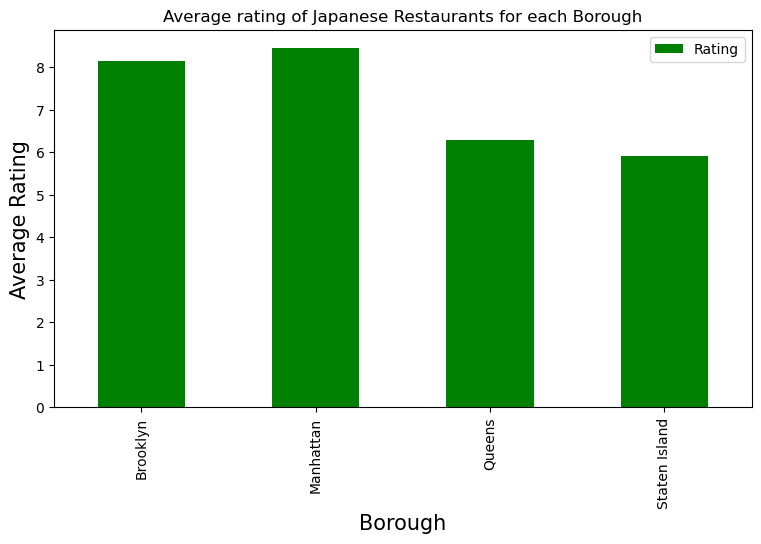

In [24]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Japanese Restaurants for each Borough')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
japanese_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color=clr)
plt.legend()
plt.show()

#### We will consider all the neighborhoods with average rating greater or equal 8.0 to visualize on a map

In [25]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Bedford Stuyvesant,8.200000
1,Boerum Hill,8.700000
2,Brooklyn Heights,8.100000
6,Chelsea,8.800000
9,Cobble Hill,9.100000
10,Downtown,8.900000
11,East Village,9.250000
13,Flatiron,8.875000
14,Fort Greene,8.600000
18,Grasmere,8.100000


#### We will join this Dataset to original New York data to get longitude and latitude

In [26]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Brooklyn,Bedford Stuyvesant,40.687232,-73.941785,8.200000
1,Brooklyn,Boerum Hill,40.685683,-73.983748,8.700000
2,Brooklyn,Brooklyn Heights,40.695864,-73.993782,8.100000
3,Manhattan,Chelsea,40.744035,-74.003116,8.800000
4,Staten Island,Chelsea,40.594726,-74.189560,8.800000
5,Brooklyn,Cobble Hill,40.687920,-73.998561,9.100000
6,Brooklyn,Downtown,40.690844,-73.983463,8.900000
7,Manhattan,East Village,40.727847,-73.982226,9.250000
8,Manhattan,Flatiron,40.739673,-73.990947,8.875000
9,Brooklyn,Fort Greene,40.688527,-73.972906,8.600000


### Show this data on a map

In [27]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

#### Let's add a new field to dataframe for labeling purpose

In [28]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add ratings to map
ny_map.add_child(rating)

### Results / Conclusion

Manhattan and Brooklyn have the best rated Japanese restaurants on average. Staten Island and The Bronx have the least amount of Japanese restaurants per borough. However, of note, Murray Hill in Manhattan has the highest number of Japanese Restaurants in all of NY. Despite Manhattan having the least number of neighborhoods in all five boroughs, it has the most number of Japanese restaurants. Based on the above information, I would state that Manhattan and Brooklyn are the best locations for Japanese cuisine in NYC. To have the best shot of success, I would open a Japanese restaurant in Brooklyn. Brooklyn has multiple neighborhoods with average ratings exceeding 8.0 on a scale of 1.0 to 10.0 and has less amount of Japanese restaurants than Manhattan, making competition easier. Also we should keep in mind, that real estate prices in Brooklyn are much cheaper than in Manhattan.